In [0]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt

import csv
import numpy as np
%matplotlib inline

import cv2
import glob
from IPython.display import Image

In [0]:
filename_read = os.path.join("drive/My Drive/Data/HousesInfo.txt")

In [0]:
cols=["Bedrooms","Bathrooms","area","zipcode","price"]

In [0]:
df = pd.read_csv(filename_read , sep=" ", header=None , names=cols)

In [7]:
df.shape

(535, 5)

In [9]:
index1= df[df['price'] > 900000].index
index1

Int64Index([  3,   4,   5,   7,   8,   9,  11,  18,  19,  20,  21,  23,  24,
             25,  26,  28,  29,  31,  33,  34,  35,  36,  38,  86,  90,  92,
             96, 109, 111, 112, 115, 125, 128, 130, 132, 133, 136, 143, 146,
            148, 149, 150, 156, 164, 168, 170, 172, 184, 185, 186, 190, 192,
            202, 203, 207, 209, 214, 215, 216, 218, 219, 220, 223, 224, 226,
            255, 256, 260, 261, 266, 268, 270, 395, 421, 472, 476, 485, 499],
           dtype='int64')

In [10]:
index2=df[df['price'] <100000].index
index2

Int64Index([ 68,  94, 152, 257, 285, 288, 289, 333, 340, 341, 344, 345, 348,
            350, 351, 352, 353, 357, 359, 360, 362, 364, 365, 368, 369, 370,
            372, 375, 378, 380, 383, 385, 386, 387, 388, 393, 397, 398, 399,
            400, 403, 404, 410, 413, 414, 415, 416, 417, 418, 419, 506],
           dtype='int64')

In [0]:

df = df.drop(df[df.price > 900000].index)

In [0]:
df = df.drop(df[df.price < 100000].index)

In [13]:
df.shape

(406, 5)

In [0]:
df['y'] = df['price']


In [0]:
y = df[['y']].copy()
x = df.drop(['y'], axis = 1)

In [16]:
x.shape,y.shape

((406, 5), (406, 1))

In [0]:
encode_text_dummy(df,'Bedrooms')
encode_text_dummy(df,'Bathrooms')
encode_numeric_zscore(df,'area')
encode_text_dummy(df,'zipcode')
encode_numeric_zscore(df,'price')

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)

In [0]:
new_images=[]
for number in range(1, 536):
    for path in glob.glob("drive/My Drive/Data/" + str(number) + "_bathroom.jpg"):
        if os.path.isfile(path):
            new_images.append(path) 

In [0]:
img= pd.DataFrame(new_images,columns = ['bathroom_img'])

In [0]:
## bedroom images
bedroom_images = []
for number in range(1, 536):
    for path in glob.glob("drive/My Drive/Data/" + str(number) + "_bedroom.jpg"):
        if os.path.isfile(path):
            bedroom_images.append(path) 

In [0]:
img['bedroom_img']=bedroom_images

In [0]:
frontal_images = []
for number in range(1, 536):
    for path in glob.glob("drive/My Drive/Data/" + str(number) + "_frontal.jpg"):
        if os.path.isfile(path):
            frontal_images.append(path) 

In [0]:
img['frontal_img']=frontal_images

In [0]:
kitchen_images = []
for number in range(1, 536):
    for path in glob.glob("drive/My Drive/Data/" + str(number) + "_kitchen.jpg"):
        if os.path.isfile(path):
            kitchen_images.append(path) 

In [0]:
img['kitchen_img']=kitchen_images

In [27]:
img.head()

,bathroom_img,bedroom_img,frontal_img,kitchen_img
0,drive/My Drive/Data/1_bathroom.jpg,drive/My Drive/Data/1_bedroom.jpg,drive/My Drive/Data/1_frontal.jpg,drive/My Drive/Data/1_kitchen.jpg
1,drive/My Drive/Data/2_bathroom.jpg,drive/My Drive/Data/2_bedroom.jpg,drive/My Drive/Data/2_frontal.jpg,drive/My Drive/Data/2_kitchen.jpg
2,drive/My Drive/Data/3_bathroom.jpg,drive/My Drive/Data/3_bedroom.jpg,drive/My Drive/Data/3_frontal.jpg,drive/My Drive/Data/3_kitchen.jpg
3,drive/My Drive/Data/4_bathroom.jpg,drive/My Drive/Data/4_bedroom.jpg,drive/My Drive/Data/4_frontal.jpg,drive/My Drive/Data/4_kitchen.jpg
4,drive/My Drive/Data/5_bathroom.jpg,drive/My Drive/Data/5_bedroom.jpg,drive/My Drive/Data/5_frontal.jpg,drive/My Drive/Data/5_kitchen.jpg


In [28]:
#img.drop(index1)
img = img.drop(index1)

img.shape

(457, 4)

In [29]:
#img.drop(index1)
img = img.drop(index2)

img.shape

(406, 4)

In [30]:
img.shape

(406, 4)

In [0]:
images_output=[]
for row_index,row in img.iterrows():
            inputImages=[]
            outputImage = np.zeros((128, 128, 3), dtype="uint8")
            image_temp1 = cv2.imread(row.bathroom_img)
            image1 = cv2.resize(image_temp1, (64 , 64))
            
            image_temp2 = cv2.imread(row.bedroom_img)
            image2 = cv2.resize(image_temp2, (64 , 64))
            
            image_temp3 = cv2.imread(row.frontal_img)
            image3 = cv2.resize(image_temp3, (64 , 64))
            
            image_temp4 = cv2.imread(row.kitchen_img)
            image4 = cv2.resize(image_temp4, (64 , 64))
              
            inputImages.append(image1)
            inputImages.append(image2)
            inputImages.append(image3)
            inputImages.append(image4)
            
            outputImage[0:64, 0:64] = inputImages[0]
            outputImage[0:64, 64:128] = inputImages[1]
            outputImage[64:128, 64:128] = inputImages[2]
            outputImage[64:128, 0:64] = inputImages[3]
            
        
            images_output.append(outputImage)      
            

In [ ]:
from matplotlib import pyplot as plt
for i in images_output:
     plt.figure(figsize=(8,8))
     plt.imshow(i, interpolation='nearest')
     plt.show()

In [0]:
img_arr=np.asarray(images_output)

In [0]:
img_train,img_test = train_test_split(img_arr,test_size=0.25, random_state=33)

In [47]:
print("Shape of img_train: {}".format(img_train.shape))
print("Shape of img_test: {}".format(img_test.shape))

Shape of img_train: (304, 128, 128, 3)
Shape of img_test: (102, 128, 128, 3)


In [0]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
import keras              
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


model1 = Sequential()
model1.add(Dense(256, input_dim=x_train.shape[1], activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(32, activation="relu"))
model1.add(Dense(1))


visible = Input(shape=(128,128,3))
convlayer1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
poollayer1 = MaxPooling2D(pool_size=(2, 2))(convlayer1)
convlayer2 = Conv2D(16, kernel_size=4, activation='relu')(poollayer1)
poollayer2 = MaxPooling2D(pool_size=(2, 2))(convlayer2)
flatlayer1 = Flatten()(poollayer2)
model2 = Model(visible, flatlayer1)

merge = concatenate([model1.output, flatlayer1])



Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
dense_9_input (InputLayer)      (None, 5)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 256)          1536        dense_9_input[0][0]              
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 125, 125, 32) 1568        input_2[0][0]                    
____________________________________________________________________________________________

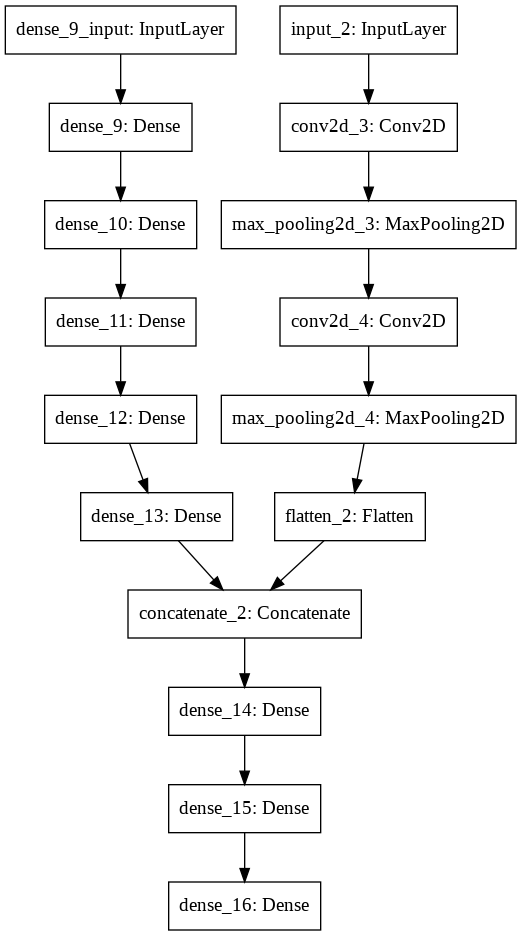

In [49]:

hidden1 = Dense(50, activation='relu')(merge)
hidden2 = Dense(40, activation='relu')(hidden1)
output = Dense(1, activation='relu')(hidden2)

model = Model(inputs=[model1.input, model2.input], outputs=output)
print(model.summary())


plot_model(model)

In [50]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

checkpointer = ModelCheckpoint(filepath="drive/My Drive/best_weights_cnn.hdf5", verbose=2, save_best_only=True) # save best model 

model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=2, verbose=1, mode='auto')
model.fit([x_train, img_train], y_train,batch_size=64,validation_data=([x_test, img_test], y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 304 samples, validate on 102 samples
Epoch 1/1000
 - 1s - loss: 277565684035.3684 - val_loss: 273456641525.9608
Epoch 2/1000
 - 0s - loss: 252791826539.7895 - val_loss: 218479894367.3726
Epoch 3/1000
 - 0s - loss: 165882491957.8947 - val_loss: 83389124848.9412
Epoch 4/1000
 - 0s - loss: 51293168693.8947 - val_loss: 66997849228.5490
Epoch 5/1000
 - 0s - loss: 60961608326.7368 - val_loss: 27561413531.6078
Epoch 6/1000
 - 0s - loss: 29445415989.8947 - val_loss: 34356616734.1176
Epoch 7/1000
 - 0s - loss: 29380457849.2632 - val_loss: 17979729317.6471
Epoch 8/1000
 - 0s - loss: 14832198656.0000 - val_loss: 14169904609.8824
Epoch 9/1000
 - 0s - loss: 13934438912.0000 - val_loss: 7144806108.8627
Epoch 10/1000
 - 0s - loss: 6943944380.6316 - val_loss: 6534419496.1569
Epoch 11/1000
 - 0s - loss: 4945739290.9474 - val_loss: 2774973660.8627
Epoch 12/1000
 - 0s - loss: 3223582288.8421 - val_loss: 2299439676.2353
Epoch 13/1000
 - 0s - loss: 1920072360.4211 - val_loss: 1614722778.3529
Epoch

In [51]:

from sklearn import metrics

model_pred = model.predict([x_test,img_test])

score = np.sqrt(metrics.mean_squared_error(y_test,model_pred)) 

print("Score (RMSE) : {}".format(score))
print("R2 score     :",metrics.r2_score(y_test,model_pred))
print("MSE          :", metrics.mean_squared_error(y_test, model_pred))

Score (RMSE) : 7466.730785197565
R2 score     : 0.9988160097639368
MSE          : 55752068.618617035


In [0]:
model_pred = np.asarray(model_pred)
y_test = np.asarray(y_test)

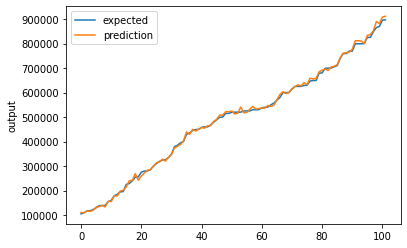

In [53]:

chart_regression(model_pred.flatten(),y_test)
